Objetivos: 
1. Analisar quais classes animais estão com sua tendencia populacional diminuindo
2. Analisar correlações com a tendencia populacional
3. Analisar os biomas onde a redução da tendencia populacional é maior (e quais classes de animal)

In [83]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv('fauna.csv')

In [51]:
#renomear coluna 
df.rename(columns={'Possivemente_Extinta': 'Possivelmente_Extinta'}, inplace=True)

In [14]:
df.replace(to_replace='nan', value=np.nan, inplace=True)

Excluindo coluna Reino porque todos são do reino animal 

In [37]:
df.drop('Reino', axis=1, inplace=True)

In [49]:
df.Endemica_Brasil.unique()

array(['Sim', 'Não'], dtype=object)

## Preparando os dados

Aqui iremos tratar os dados. Remover valores nulos, selecionar as colunas que vamos usar e transfomar as variaveis categoricas em numericas

In [ ]:
useful_df = df[['Classe', 'Ordem', 'Familia', 'Genero', 'Especie', 'Categoria', 'Endemica_Brasil', 'Estado', 'Regiao', 'Bioma', 'Tendencia_Populacional']]

,Classe,Ordem,Familia,Genero,Especie,Categoria,Endemica_Brasil,Estado,Regiao,Bioma,Tendencia_Populacional
0,Insecta,Lepidoptera,Nymphalidae,Adelpha,Adelpha atlantica,Em Perigo,Sim,Rio de Janeiro,|Sudeste|,Mata Atlântica,Desconhecida
1,Elasmobranchii,Lamniformes,Alopiidae,Alopias,Alopias superciliosus,Em Perigo,Não,"Alagoas, Amapá, Bahia, Ceará, Espírito Santo, ...",|Nordeste|Norte|Sudeste|Sul|,Sistema Costeiro-Marinho,Declinando
2,Elasmobranchii,Lamniformes,Alopiidae,Alopias,Alopias vulpinus,Criticamente em Perigo,Não,"Alagoas, Amapá, Bahia, Ceará, Espírito Santo, ...",|Nordeste|Norte|Sudeste|Sul|,Sistema Costeiro-Marinho,Declinando
3,Aves,Galliformes,Cracidae,Aburria,Aburria cujubi,Vulnerável,Não,"Amazonas, Goiás, Maranhão, Mato Grosso, Mato G...",|Centro-Oeste|Nordeste|Norte|,"Amazônia, Cerrado, Pantanal",Declinando
4,Aves,Psittaciformes,Psittacidae,Aratinga,Aratinga solstitialis,Em Perigo,Não,Roraima,|Norte|,Amazônia,Declinando
...,...,...,...,...,...,...,...,...,...,...,...
92,Insecta,Coleoptera,Lucanidae,Altitatiayus,Altitatiayus koikei,Vulnerável,Sim,Minas Gerais,|Sudeste|,Mata Atlântica,Desconhecida
93,Insecta,Coleoptera,Lucanidae,Altitatiayus,Altitatiayus rotundatus,Vulnerável,Sim,Rio de Janeiro,|Sudeste|,Mata Atlântica,Desconhecida
94,Insecta,Coleoptera,Lucanidae,Altitatiayus,Altitatiayus ruficollis,Vulnerável,Sim,Rio de Janeiro,|Sudeste|,Mata Atlântica,Desconhecida
95,Insecta,Coleoptera,Lucanidae,Altitatiayus,Altitatiayus trifurcatus,Vulnerável,Sim,Minas Gerais,|Sudeste|,Mata Atlântica,Desconhecida


In [62]:
useful_df.dropna(inplace=True)

C:\Users\KKKKKKKKKKKKKKKKKKKK\AppData\Local\Temp\ipykernel_34044\846556609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df.dropna(inplace=True)


In [68]:
useful_df['Bioma'] = useful_df['Bioma'].str.split(', ')
useful_df = useful_df.explode('Bioma')

useful_df['Estado'] = useful_df['Estado'].str.split(', ')
useful_df = useful_df.explode('Estado')

useful_df['Regiao'] = useful_df['Regiao'].str.split('|')
useful_df = useful_df.explode('Regiao')

C:\Users\KKKKKKKKKKKKKKKKKKKK\AppData\Local\Temp\ipykernel_34044\2535939284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['Bioma'] = useful_df['Bioma'].str.split(', ')


In [ ]:
useful_df.reset_index(inplace=True)


In [76]:
useful_df.drop('level_0', axis=1, inplace=True)

In [79]:
useful_df.replace(to_replace='', value=np.nan, inplace=True)
useful_df.dropna(inplace=True)

In [81]:
useful_df.Bioma.unique()

array(['Mata Atlântica', 'Sistema Costeiro-Marinho', 'Amazônia',
       'Cerrado', 'Pantanal', 'Caatinga', 'Pampa'], dtype=object)

## Relacão por bioma 

série de analises graficas relacionando o bioma com diversos fatores 

In [85]:
#dataframe bioma : tendendica populacional = decaindo 

bioma_tp = useful_df.groupby('Bioma')['Tendencia_Populacional'].value_counts()
bioma_tp

Bioma                     Tendencia_Populacional
Amazônia                  Declinando                 66
                          Desconhecida                9
Caatinga                  Declinando                 54
                          Desconhecida               10
                          Aumentando                  1
Cerrado                   Declinando                166
                          Desconhecida                8
Mata Atlântica            Declinando                161
                          Desconhecida               48
                          Estável                     1
Pampa                     Declinando                 31
                          Desconhecida               11
                          Estável                     1
Pantanal                  Declinando                 56
Sistema Costeiro-Marinho  Declinando                157
                          Desconhecida                1
Name: count, dtype: int64

AttributeError: Rectangle.set() got an unexpected keyword argument 'pallet'

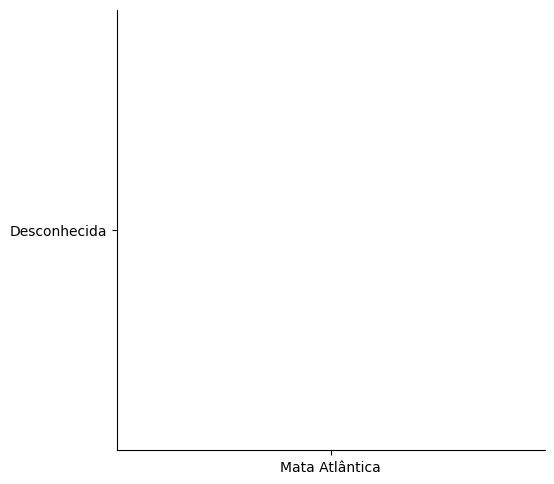

In [ ]:
#grafico de barras bioma tendencia populacional
pivoted_bioma_tp = bioma_tp.pivot_table(bioma_tp, index='Bioma', columns='Tendencia_Populacional', values='count', fill_value=0)
plt.title("Tendencia Populacional por Bioma")
plt.legend()
plt.show()